In [23]:
# This code reads a CSV file containing data on Brazilian individuals and maps coded values in specific columns to descriptive text labels. Mappings are defined for variables such as gender, education level, work sector, metropolitan area status, race, urban/rural location, work permit status and poverty level. This setup makes the data more interpretable for further analysis or visualization.

# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV File
df = pd.read_csv('brazil.csv')
#  Map Coded Numbers to Text Labels
# Define dictionaries to replace codes with descriptive text

# Mapping for 'woman'
gender_map = {1: 'female', 0: 'male'}
# Mapping for 'education'
education_map = {
    1: 'No education / <1 year', 2: 'Incomplete elementary',
    3: 'Complete elementary', 4: 'Incomplete secondary',
    5: 'Complete secondary', 6: 'Incomplete higher',
    7: 'Complete higher'
}
# Mapping for 'work'
work_map = {
    1: 'Agriculture', 2: 'General industry', 3: 'Construction',
    4: 'Trade/repair', 5: 'Transport', 6: 'Accommodation/food',
    7: 'Information/finance/real estate', 8: 'Public administration',
    9: 'Education/health/social services', 10: 'Other services',
    11: 'Home services', 12: 'Undefined'
}
# Mapping for 'metropolitan_area'
metropolitan_map = {1: 'metropolitan region', 0: 'non-metropolitan region'}
# Mapping for 'non_white'
non_white_map = {1: 'non-white', 0: 'white'}
# Mapping for 'urban'
urban_map = {1: 'urban', 0: 'rural'}
# Mapping for 'work_permit'
work_permit_map = {0: 'no work permit', 1: 'has work permit', 2: 'other (employer, civil servant)'}
# Mapping for 'poverty'
poverty_map = {1: 'poor', 0: 'not poor'}

#  Apply the Mappings to Replace Codes with Descriptive Text
df['woman'] = df['woman'].map(gender_map)
df['education'] = df['education'].map(education_map)
df['work'] = df['work'].map(work_map)
df['metropolitan_area'] = df['metropolitan_area'].map(metropolitan_map)
df['non_white'] = df['non_white'].map(non_white_map)
df['urban'] = df['urban'].map(urban_map)
df['work_permit'] = df['work_permit'].map(work_permit_map)
df['poverty'] = df['poverty'].map(poverty_map)

#  Display the First 5 Rows with Descriptive Text
df.head()

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,male,59,Complete secondary,Public administration,metropolitan region,non-white,urban,has work permit,not poor
1,male,21,Complete secondary,Public administration,metropolitan region,white,urban,no work permit,not poor
2,male,59,Incomplete elementary,Education/health/social services,metropolitan region,non-white,urban,has work permit,not poor
3,female,58,Complete secondary,Public administration,metropolitan region,non-white,urban,"other (employer, civil servant)",not poor
4,female,56,Incomplete elementary,Education/health/social services,metropolitan region,non-white,urban,has work permit,not poor


In [25]:
# Check for any missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# display all rows with missing value
rows_with_missing = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing)

Missing values in each column:
non_white    1
dtype: int64

Rows with missing values:
     woman  age        education                             work  \
6986  male   58  Complete higher  Information/finance/real estate   

        metropolitan_area non_white  urban                      work_permit  \
6986  metropolitan region       NaN  urban  other (employer, civil servant)   

       poverty  
6986  not poor  


In [ ]:
Defined Questions to Explore the Dataset

1. What is the distribution of poverty across different education levels?
2. What is the average age across different work categories?
3. How does the distribution of education levels differ between individuals living in urban vs. rural   areas?
4. How does the distribution of job types differ between individuals living in metropolitan areas versus non-metropolitan areas and is there a significant difference in the average age for each job type based on location?
5. What is the distribution of individuals across different work sectors, 
    considering both age and gender, for those living in metropolitan vs. non-metropolitan areas?



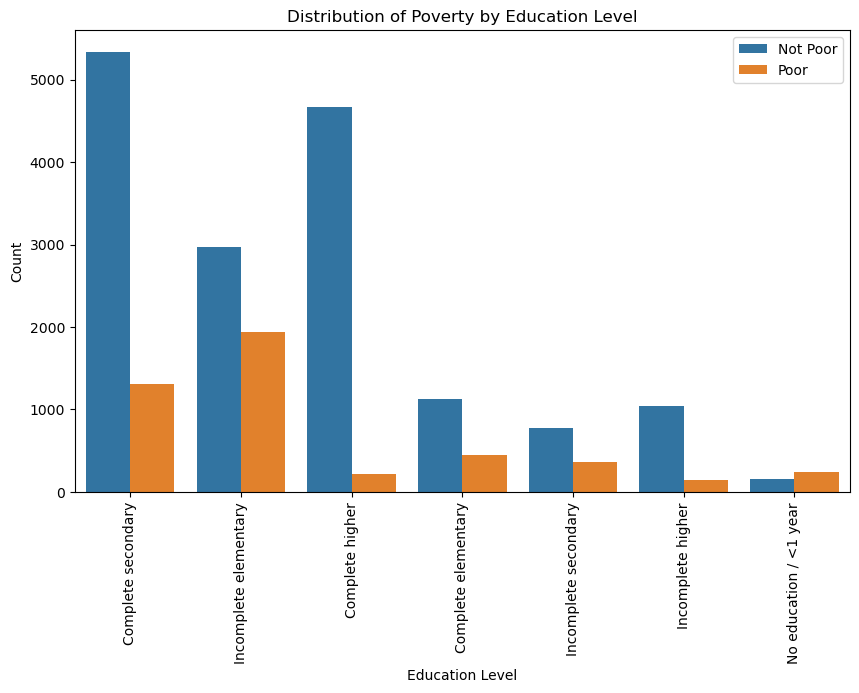

In [122]:
# 1. What is the distribution of poverty across different education levels?
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='poverty', data=df)
plt.title('Distribution of Poverty by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(['Not Poor', 'Poor'])
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()

work
Accommodation/food                  40.937783
Agriculture                         44.016280
Construction                        40.987600
Education/health/social services    41.443699
General industry                    39.857606
Home services                       43.963542
Information/finance/real estate     38.803111
Other services                      39.284577
Public administration               42.115143
Trade/repair                        38.394221
Transport                           42.256726
Undefined                           36.000000
Name: age, dtype: float64


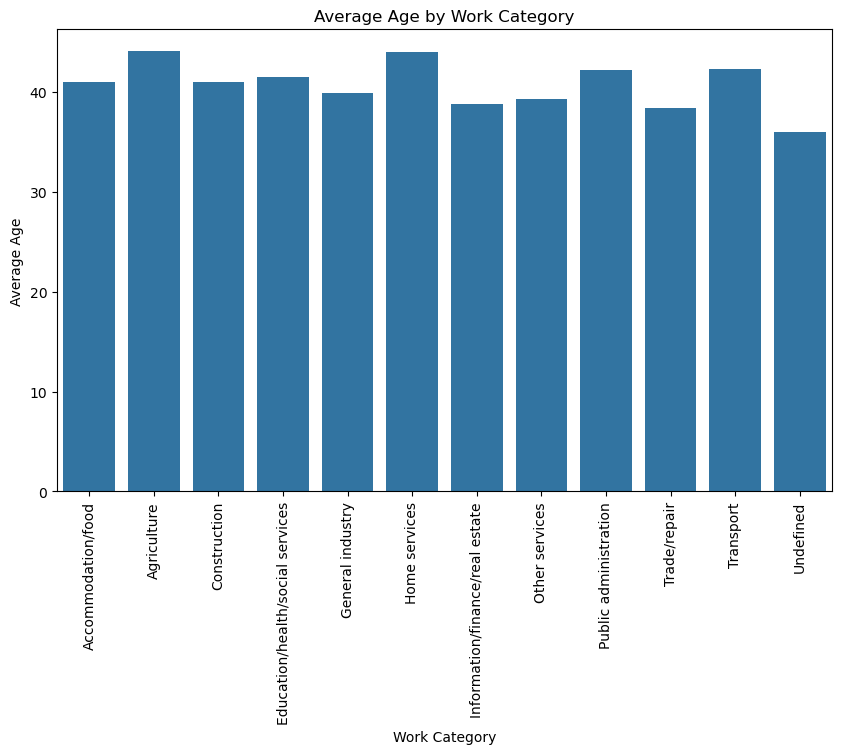

In [63]:
#2 What is the average age across different work categories?

# Group the data by the 'work' column and calculate the mean age for each work category
average_age_by_work = df.groupby('work')['age'].mean()

# Display the result
print(average_age_by_work)

# Plot the average age by work category
plt.figure(figsize=(10,6))
sns.barplot(x=average_age_by_work.index, y=average_age_by_work.values)
plt.title('Average Age by Work Category')
plt.xlabel('Work Category')
plt.ylabel('Average Age')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


In [ ]:
# This plot helps identify trends such as which job sectors are more likely to have older workers and which ones attract younger individuals.
# For example, Information/finance/real estate and Trade/repair tend to have younger workers,
# while Agriculture and Home services may have older employees.

In [78]:
#3. How does the distribution of job types differ between individuals living in metropolitan areas versus non-metropolitan areas and
#   is there a significant difference in the average age for each job type based on location?

# They help to highlight differences in workforce demographics between urban and rural populations and how job categories are distributed across these regions.
#  Group by work type and metropolitan area, and aggregate count and mean age
work_metropolitan_summary = df.groupby(['work', 'metropolitan_area']).agg(
    count=('age', 'size'),     # Count of individuals
    average_age=('age', 'mean') # Average age
)

# Display the result
print(work_metropolitan_summary)

                                                          count  average_age
work                             metropolitan_area                          
Accommodation/food               metropolitan region        404    40.990099
                                 non-metropolitan region    480    40.893750
Agriculture                      metropolitan region        132    42.431818
                                 non-metropolitan region   2755    44.092196
Construction                     metropolitan region        470    42.029787
                                 non-metropolitan region    901    40.443951
Education/health/social services metropolitan region       1205    41.837344
                                 non-metropolitan region   1628    41.152334
General industry                 metropolitan region        789    40.825095
                                 non-metropolitan region   1676    39.402148
Home services                    metropolitan region        408    45.899510

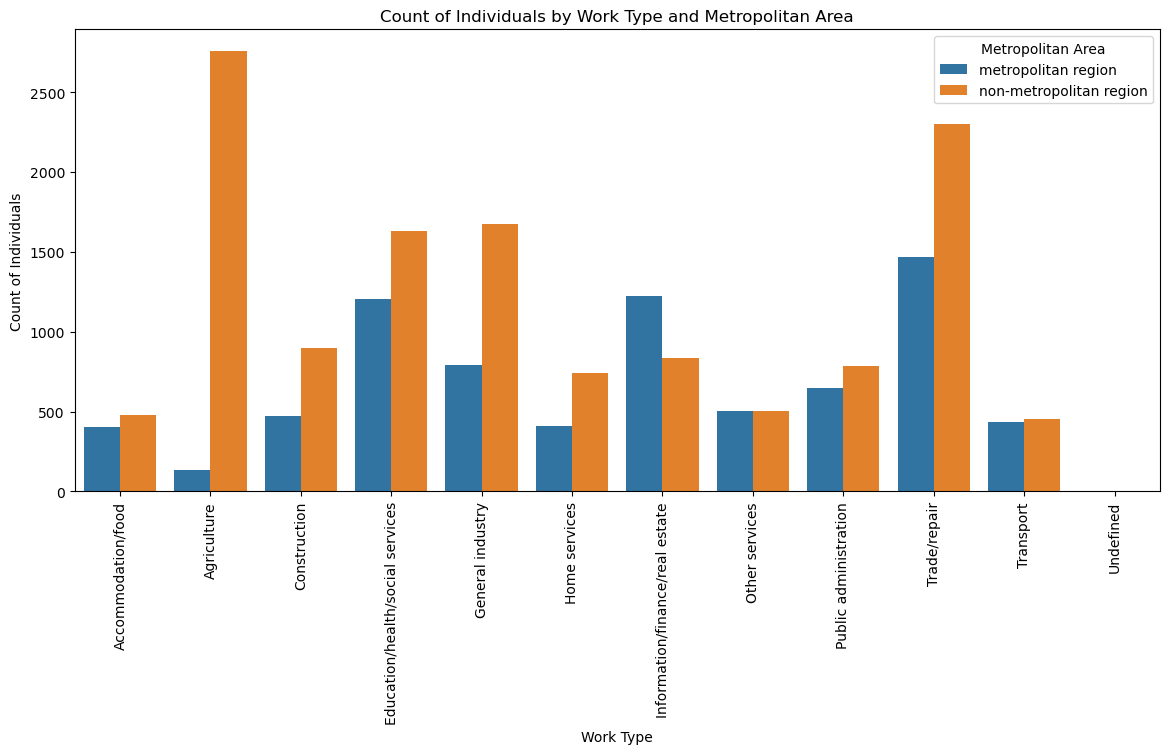

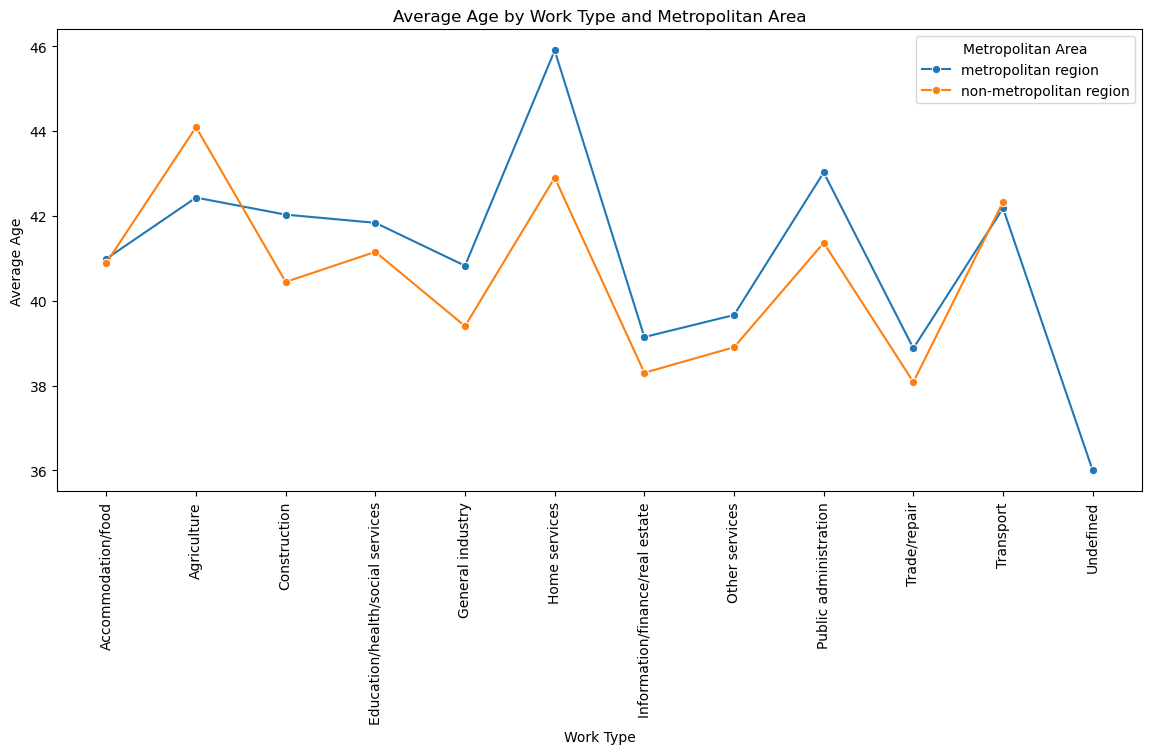

In [86]:
work_metropolitan_summary = work_metropolitan_summary.reset_index()

# Plot the count of individuals by work type and metropolitan area
plt.figure(figsize=(14, 6))
sns.barplot(x='work', y='count', hue='metropolitan_area', data=work_metropolitan_summary)
plt.title('Count of Individuals by Work Type and Metropolitan Area')
plt.xlabel('Work Type')
plt.ylabel('Count of Individuals')
plt.legend(title='Metropolitan Area')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()

# Plot the average age by work type and metropolitan area
plt.figure(figsize=(14, 6))
sns.lineplot(x='work', y='average_age', hue='metropolitan_area', data=work_metropolitan_summary, marker='o')
plt.title('Average Age by Work Type and Metropolitan Area')
plt.xlabel('Work Type')
plt.ylabel('Average Age')
plt.legend(title='Metropolitan Area')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()

In [118]:
# 4. How does the distribution of education levels differ between individuals living in urban vs. rural areas?
# Pivot table to see education distribution in urban vs. rural areas
pivot_education_urban = df.pivot_table(
    index="education",
    columns="urban",
    values="age",   # Arbitrary numeric column  (can use age or a count for number of records)
    aggfunc="count" # Counts the number of individuals per education level and area type
)

# Display the pivot table
print(pivot_education_urban)

urban                   rural  urban
education                           
Complete elementary       441   1142
Complete higher           327   4560
Complete secondary        994   5650
Incomplete elementary    2068   2845
Incomplete higher          98   1083
Incomplete secondary      277    868
No education / <1 year    222    177


urban                   rural  urban
education                           
Complete elementary       441   1142
Complete higher           327   4560
Complete secondary        994   5650
Incomplete elementary    2068   2845
Incomplete higher          98   1083
Incomplete secondary      277    868
No education / <1 year    222    177


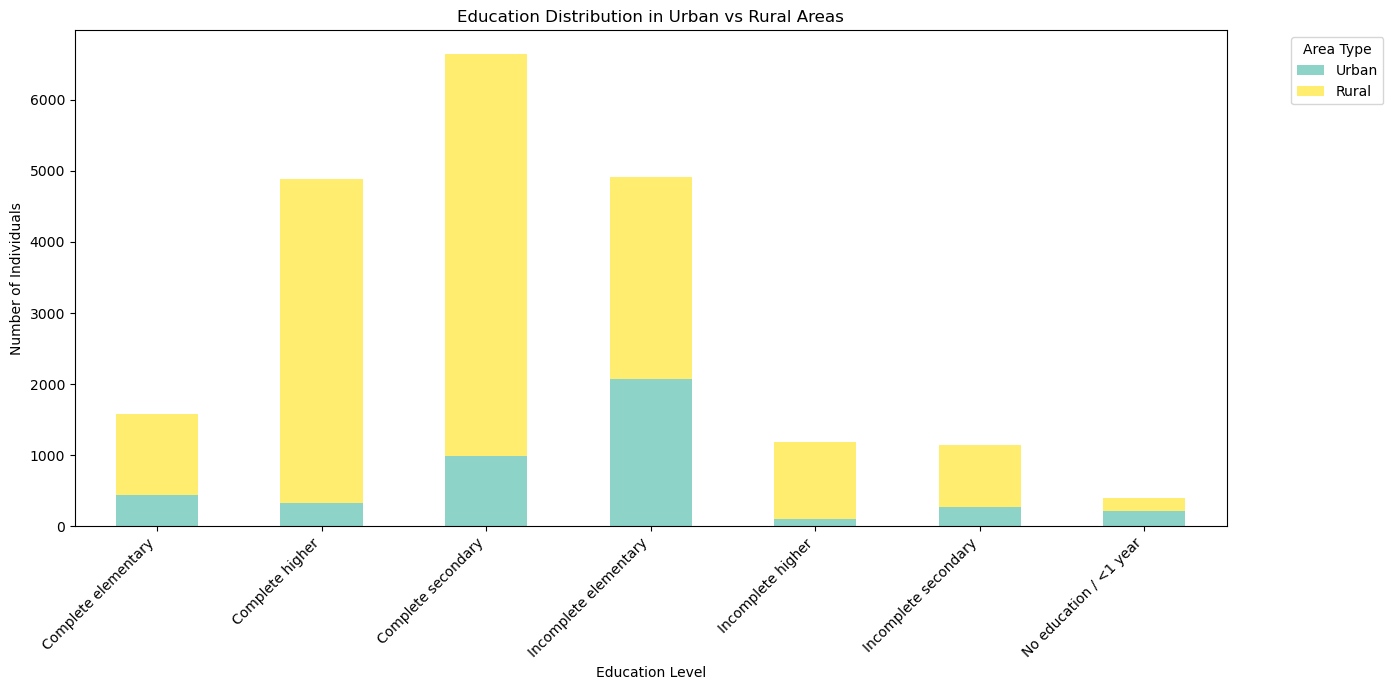

In [120]:
# Pivot table to see education distribution in urban vs. rural areas
pivot_education_urban = df.pivot_table(
    index="education",
    columns="urban",
    values="age",   
    aggfunc="count" 
)

# Display the pivot table
print(pivot_education_urban)

# Plotting the pivot table
pivot_education_urban.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')

# Adding labels and title to the plot
plt.title('Education Distribution in Urban vs Rural Areas')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area Type', labels=['Urban', 'Rural'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\alexa\AppData\Local\Temp\ipykernel_21252\2272093326.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_distribution = df.groupby(['work', 'urban', 'woman', 'age_group']).size().reset_index(name='count')
C:\Users\alexa\AppData\Local\Temp\ipykernel_21252\2272093326.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


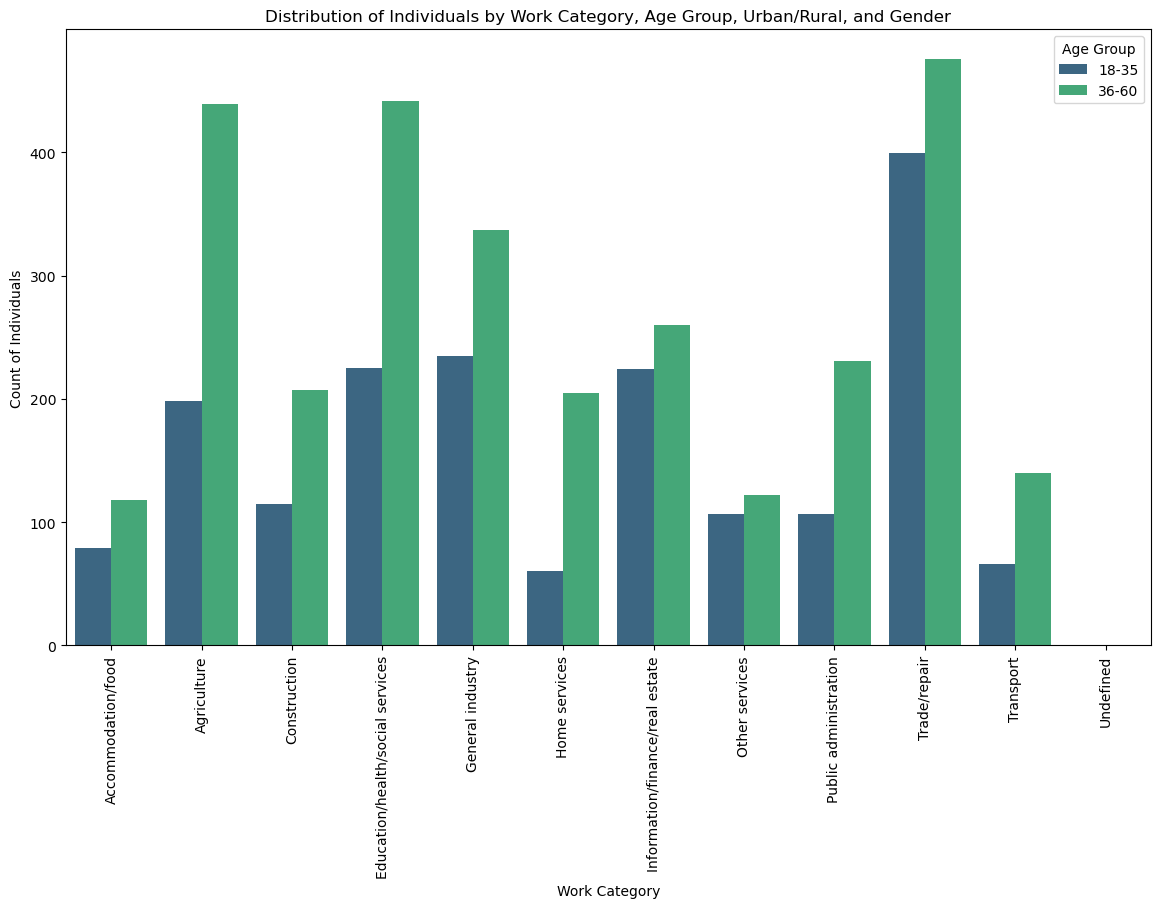

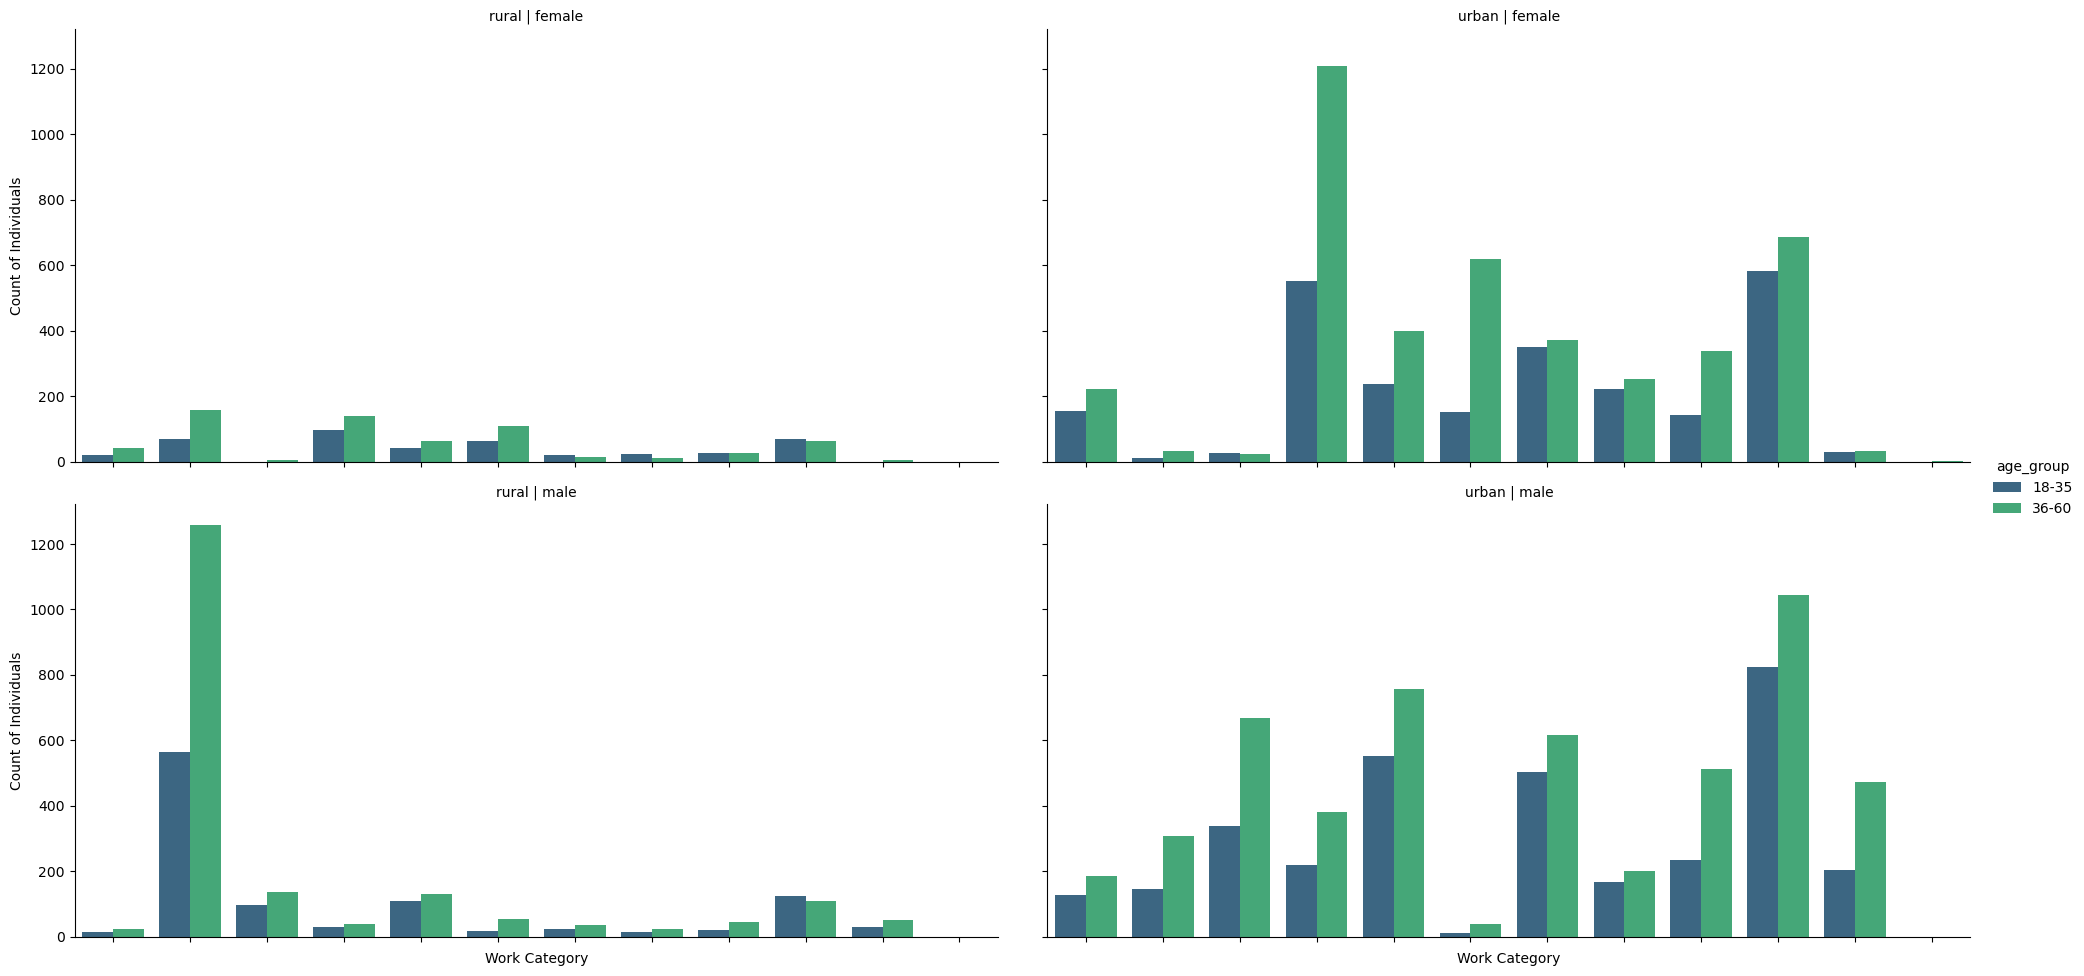

In [30]:
# 5. What is the distribution of individuals across different work sectors, 
# considering both age and gender, for those living in metropolitan vs. non-metropolitan areas?
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV File
df = pd.read_csv('brazil.csv')

# Mapping coded numbers to text labels
gender_map = {1: 'female', 0: 'male'}
education_map = {
    1: 'No education / <1 year', 2: 'Incomplete elementary',
    3: 'Complete elementary', 4: 'Incomplete secondary',
    5: 'Complete secondary', 6: 'Incomplete higher',
    7: 'Complete higher'
}
work_map = {
    1: 'Agriculture', 2: 'General industry', 3: 'Construction',
    4: 'Trade/repair', 5: 'Transport', 6: 'Accommodation/food',
    7: 'Information/finance/real estate', 8: 'Public administration',
    9: 'Education/health/social services', 10: 'Other services',
    11: 'Home services', 12: 'Undefined'
}
metropolitan_map = {1: 'metropolitan region', 0: 'non-metropolitan region'}
non_white_map = {1: 'non-white', 0: 'white'}
urban_map = {1: 'urban', 0: 'rural'}
work_permit_map = {0: 'no work permit', 1: 'has work permit', 2: 'other (employer, civil servant)'}
poverty_map = {1: 'poor', 0: 'not poor'}

# Apply mappings
df['woman'] = df['woman'].map(gender_map)
df['education'] = df['education'].map(education_map)
df['work'] = df['work'].map(work_map)
df['metropolitan_area'] = df['metropolitan_area'].map(metropolitan_map)
df['non_white'] = df['non_white'].map(non_white_map)
df['urban'] = df['urban'].map(urban_map)
df['work_permit'] = df['work_permit'].map(work_permit_map)
df['poverty'] = df['poverty'].map(poverty_map)

# Filter and create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 35, 60], labels=['18-35', '36-60'])

# Group by work, urban/rural, gender, and age_group
age_group_distribution = df.groupby(['work', 'urban', 'woman', 'age_group']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='work', y='count', hue='age_group',
    data=age_group_distribution, dodge=True, ci=None,
    palette="viridis"
)
plt.title('Distribution of Individuals by Work Category, Age Group, Urban/Rural, and Gender')
plt.xlabel('Work Category')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=90)
plt.legend(title='Age Group')

# Additional facet by urban/rural and gender
g = sns.catplot(
    x='work', y='count', hue='age_group', col='urban', row='woman',
    data=age_group_distribution, kind='bar', height=5, aspect=2,
    palette="viridis", dodge=True
)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Work Category", "Count of Individuals")
g.set_titles("{col_name} | {row_name}")
plt.show()

